In [1]:
import jax
import jax.numpy as jnp
import pandas as pd
import optax

import tensorflow_probability.substrates.jax as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

import matplotlib.pyplot as plt
from tqdm import trange

from laplax import ADLaplace
from utils import train_model

In [2]:
def get_likelihood(params, aux=None):
    return tfd.Bernoulli(probs=params['p_of_h'])

def prepare_model(config_name, bijector):
    config = pd.read_pickle(f'../data/{config_name}')
    data = config['samples']
    a0 = config['prior']['alpha']
    b0 = config['prior']['beta']
    
    prior = {'p_of_h': tfd.Beta(a0, b0)}
    bijectors = {'p_of_h': bijector}
    
    
    return ADLaplace(prior, bijectors, get_likelihood), data

### coin_toss

In [3]:
model, data = prepare_model(config_name='coin_toss', bijector=tfb.Sigmoid())
optimizer = optax.adam(learning_rate=1.0)
n_epochs = 100
seed = jax.random.PRNGKey(0)

params, losses = train_model(model, data, optimizer, n_epochs, seed)

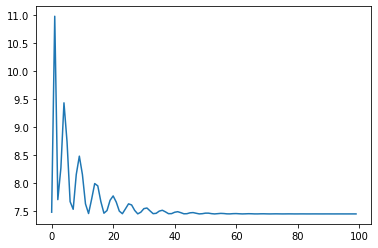

In [4]:
plt.plot(losses);

In [5]:
posterior = model.apply(params, data)

In [7]:
pd.to_pickle({'params': params, 'model': model, 'data': data}, '../results/coin_toss/results_data/laplax_coin_toss', protocol=1)